In [1]:
# Parameters
DF_FEAT_FP = "data/module_datasets/regression.csv"

In [2]:
# Parameters
DF_FEAT_FP = "/Users/gun/Desktop/\u1106\u1175\u1105\u1162\u110b\u1166\u1109\u1166\u11ba AI \u1100\u1169\u11bc\u1106\u1169\u110c\u1165\u11ab/data/module_datasets/regression.csv"


In [3]:
import os
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection    import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from lightgbm                  import LGBMRegressor


# ── 1) 데이터 로드 ─────────────────────────────────────────
BASE   = "/Users/gun/Desktop/미래에셋 AI 공모전/data"
REG_FP = os.path.join(BASE, "module_datasets", "regression.csv")

df = pd.read_csv(REG_FP, parse_dates=["rcept_dt"], dtype={"stock_code":str})

# ── 2) 타깃 설정(ret_1d) ────────────────────────────────────
df = df.dropna(subset=["ret_1d"]).reset_index(drop=True)
target = "ret_1d"
y = df[target]

# ── 3) 피처 분리 ────────────────────────────────────────────
X = df.drop(columns=[target, "stock_code", "rcept_dt", "corp_name"], errors="ignore")

# ── 4) 범주형 vs. 수치형 구분 ───────────────────────────────
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

# ── 5) 전처리 & 모델 파이프라인 ─────────────────────────────
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("ohe",   OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
], remainder="drop")

pipe = Pipeline([
    ("pre", preprocessor),
    ("reg", LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1
    ))
])

# ── 6) 시계열 분할 교차검증 ─────────────────────────────────
tscv = TimeSeriesSplit(n_splits=5)
n_samples = len(X)

if n_samples >= tscv.get_n_splits():
    r2_scores = cross_val_score(
        pipe, X, y,
        cv=tscv,
        scoring="r2",
        n_jobs=-1
    )
    print("▶ ret_1d 회귀 R² (5-fold CV): "
          f"{r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
else:
    print(f"⚠️ 샘플 수({n_samples})가 부족해 CV를 스킵합니다 (필요: {tscv.get_n_splits()})")

# ── 7) 최종 학습/저장 ──────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
if len(X) == 0:
    print("⚠️ 회귀용 샘플이 0건이라 train_test_split을 건너뜁니다.")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )
    pipe.fit(X_train, y_train)
    print("▶ Test R² :", pipe.score(X_test, y_test))

# ── 8) 파이프라인 전체 저장 ───────────────────────────────────────────────────────
MODEL_OUT = os.path.join(BASE, "models", "lgbm_regressor_pipeline.pkl")
os.makedirs(os.path.dirname(MODEL_OUT), exist_ok=True)
joblib.dump(pipe, MODEL_OUT)
print(f"✅ 파이프라인 모델 저장 완료 → {MODEL_OUT}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 17
[LightGBM] [Info] Start training from score 0.003642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 573, number of used features: 22
[LightGBM] [Info] Start training from score 0.001223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


▶ ret_1d 회귀 R² (5-fold CV): 0.3092 ± 0.0543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2594
[LightGBM] [Info] Number of data points in the train set: 1367, number of used features: 33
[LightGBM] [Info] Start training from score 0.000098


▶ Test R² : 0.36703878087646413
✅ 파이프라인 모델 저장 완료 → /Users/gun/Desktop/미래에셋 AI 공모전/data/models/lgbm_regressor_pipeline.pkl


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [4]:
import os
import time
import warnings
import concurrent.futures

import pandas as pd
import numpy as np
import yfinance as yf
from sentence_transformers import SentenceTransformer
import ta
from requests.exceptions import JSONDecodeError as RequestsJSONDecodeError
from json.decoder        import JSONDecodeError as BuiltinJSONDecodeError

# ─────────────────────────────────────────────────────────────────────
# 0️⃣ 경로·상수 설정
BASE        = "/Users/gun/Desktop/미래에셋 AI 공모전/data"
REG_FP      = os.path.join(BASE, "module_datasets", "regression.csv")
DIV_CSV     = os.path.join(BASE, "dividend_with_text.csv")          # 텍스트 csv (jsonl -> csv 변환본)
FULL_HIST   = os.path.join(BASE, "full_price_history.csv")          # 전체 주가(리샘플된) 파일
SECTOR_FP   = os.path.join(BASE, "sector_info.csv")
OUT_FP      = os.path.join(BASE, "module_datasets", "regression_enriched.csv")

WINDOW      = 30
MAX_WORKERS = 8

warnings.filterwarnings("ignore")

# ─────────────────────────────────────────────────────────────────────
# 1️⃣ 원본 회귀 CSV & 텍스트 로드
df     = pd.read_csv(REG_FP, parse_dates=["rcept_dt"], dtype={"stock_code": str})
df_txt = pd.read_csv(DIV_CSV, parse_dates=["rcept_dt"], dtype={"stock_code": str})

# 날짜 정규화
df_txt["rcept_dt"] = pd.to_datetime(df_txt["rcept_dt"], errors="coerce")

# 텍스트 컬럼 선택
if "text" in df_txt.columns:
    TEXT_COL = "text"
elif "html" in df_txt.columns:
    TEXT_COL = "html"
else:
    raise KeyError("dividend_with_text.csv 에 'text' 또는 'html' 컬럼이 없습니다.")

# ─────────────────────────────────────────────────────────────────────
# 2️⃣ 주가 + 섹터 데이터 로드
df_full = pd.read_csv(FULL_HIST, parse_dates=["date"], dtype={"stock_code": str})
df_sec  = pd.read_csv(SECTOR_FP, dtype=str)
df_sec["stock_code"] = df_sec["stock_code"].str.zfill(6)

df_full = df_full.merge(df_sec[["stock_code", "sector"]], on="stock_code", how="left")
df_full["ret"] = df_full.groupby("stock_code")["close"].pct_change().fillna(0)
sector_ret_map = df_full.groupby(["sector", "date"])["ret"].mean().to_dict()

# ─────────────────────────────────────────────────────────────────────
# 3️⃣ KOSPI 수익률 맵 (yfinance)
try:
    kospi_df = yf.download("^KS11", start=df_full.date.min(), end=df_full.date.max(), progress=False)
    kospi_ret = kospi_df["Close"].pct_change().fillna(0)
    kospi_map = {idx.date(): r for idx, r in kospi_ret.items()}
except Exception:
    kospi_map = {}

# ─────────────────────────────────────────────────────────────────────
# 4️⃣ 텍스트 임베딩 모델
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# ─────────────────────────────────────────────────────────────────────
# 5️⃣ 종목별 히스토리 맵
df_full.sort_values(["stock_code", "date"], inplace=True)
hist_map = {code: grp.reset_index(drop=True) for code, grp in df_full.groupby("stock_code")}

# ─────────────────────────────────────────────────────────────────────
# 6️⃣ yfinance ticker info
def get_yf_info(code: str, retries: int = 3):
    for _ in range(retries):
        try:
            return yf.Ticker(code + ".KS").info
        except (RequestsJSONDecodeError, BuiltinJSONDecodeError, Exception):
            time.sleep(0.5)
    return {}

# ─────────────────────────────────────────────────────────────────────
# 7️⃣ 한 행 처리 함수
def process_row(item):
    _, row = item
    code, dt, sector = row.stock_code, row.rcept_dt, row.sector
    orig = hist_map.get(code)
    if orig is None:
        return None

    hist = orig.copy()
    # 기본 컬럼 존재 보정
    for col in ["open", "high", "low", "volume"]:
        if col not in hist.columns:
            hist[col] = hist["close"]

    # (1) 이벤트 위치 찾기 (영업일 보정)
    pos = hist["date"].searchsorted(dt)
    if pos >= len(hist) or hist.loc[pos, "date"] < dt:
        fut = hist["date"][hist["date"] >= dt]
        if fut.empty:
            return None
        pos = hist["date"].searchsorted(fut.iloc[0])

    # (2) gap_before
    gap_before = (hist["close"].iloc[pos] / hist["close"].iloc[pos-1] - 1) if pos > 0 else 0.0

    # (3) KOSPI & 섹터 전일 수익률
    ref_date = hist["date"].iloc[pos-1].date() if pos > 0 else hist["date"].iloc[pos].date()
    k_ret    = kospi_map.get(ref_date, 0.0)
    s_ret    = sector_ret_map.get((sector, hist["date"].iloc[pos-1]), 0.0)

    # (4) 텍스트 임베딩
    txt_ser = df_txt.loc[(df_txt.stock_code == code) & (df_txt.rcept_dt == dt), TEXT_COL]
    if not txt_ser.empty:
        try:
            emb = embed_model.encode(str(txt_ser.iloc[0]), show_progress_bar=False).tolist()
        except Exception:
            emb = [0.0] * 384
    else:
        emb = [0.0] * 384

    # (5) 기술적 지표 계산 위한 윈도우 슬라이스
    lo, hi = max(0, pos - WINDOW), min(len(hist), pos + WINDOW + 1)
    wdf = hist.iloc[lo:hi].copy()
    if len(wdf) != 2 * WINDOW + 1:
        return None

    wdf = ta.add_all_ta_features(
        wdf, open="open", high="high", low="low", close="close", volume="volume", fillna=True
    )
    # IchimokuIndicator (close 파라미터 제거 버전)
    ich = ta.trend.IchimokuIndicator(
        high=wdf["high"], low=wdf["low"],
        window1=9, window2=26, window3=52, fillna=True
    )
    wdf["ich_a"], wdf["ich_b"] = ich.ichimoku_a(), ich.ichimoku_b()

    # 현재(이벤트일) 행
    now = wdf.iloc[WINDOW]

    feat = row.to_dict()
    feat.update({
        "gap_before":        gap_before,
        "kospi_ret_pre1d":   k_ret,
        "sector_ret_pre1d":  s_ret,
    })

    # 기술적 지표 중 필요한 것만
    for c in now.index:
        if c.startswith(("trend_", "momentum_", "volatility_", "volume_", "ich_")):
            feat[c] = now[c]

    # 텍스트 임베딩 컬럼
    for i, v in enumerate(emb):
        feat[f"text_emb_{i}"] = float(v)

    # 재무 비율(yfinance)
    info = get_yf_info(code)
    feat["PER"]        = info.get("trailingPE",   np.nan)
    feat["PBR"]        = info.get("priceToBook",  np.nan)
    feat["market_cap"] = info.get("marketCap",    np.nan)

    return feat

# ─────────────────────────────────────────────────────────────────────
# 8️⃣ 병렬 처리
with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as exe:
    results = list(exe.map(process_row, df.iterrows()))

records = [r for r in results if r is not None]
df_out  = pd.DataFrame(records)

print(f"▶ enriched samples: {len(df_out)} / {len(df)}")

# ─────────────────────────────────────────────────────────────────────
# 9️⃣ 저장 (CSV only)
os.makedirs(os.path.dirname(OUT_FP), exist_ok=True)
df_out.to_csv(OUT_FP, index=False, encoding="utf-8-sig")
print(f"✅ 저장 완료 (CSV) → {OUT_FP}")

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HTTP Error 401: 


▶ enriched samples: 1405 / 1709
✅ 저장 완료 (CSV) → /Users/gun/Desktop/미래에셋 AI 공모전/data/module_datasets/regression_enriched.csv


In [5]:
def run_regression_block(df_reg, model_out_path):
    import os
    import joblib
    import numpy as np
    import pandas as pd

    from sklearn.model_selection    import train_test_split, TimeSeriesSplit, cross_val_score
    from sklearn.preprocessing     import OneHotEncoder, StandardScaler
    from sklearn.compose           import ColumnTransformer
    from sklearn.pipeline          import Pipeline
    from lightgbm                  import LGBMRegressor

    # 1) 타깃
    df_reg = df_reg.dropna(subset=["ret_1d"]).reset_index(drop=True)
    y = df_reg["ret_1d"]
    X = df_reg.drop(columns=["ret_1d","stock_code","rcept_dt","corp_name"], errors="ignore")

    # 2) col split
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    num_cols = [c for c in X.columns if c not in cat_cols]

    pre = ColumnTransformer([
        ("scale", StandardScaler(), num_cols),
        ("ohe",   OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ], remainder="drop")

    pipe = Pipeline([
        ("pre", pre),
        ("reg", LGBMRegressor(
            n_estimators=500,
            learning_rate=0.05,
            random_state=42,
            n_jobs=-1
        ))
    ])

    # 3) CV
    tscv = TimeSeriesSplit(n_splits=5)
    if len(X) >= tscv.get_n_splits():
        r2 = cross_val_score(pipe, X, y, cv=tscv, scoring="r2", n_jobs=-1)
        print(f"▶ 회귀 R² (5-fold CV): {r2.mean():.4f} ± {r2.std():.4f}")
    else:
        print(f"⚠️ 샘플 수({len(X)})가 부족해 CV 스킵")

    # 4) Train/Test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )
    pipe.fit(X_train, y_train)
    print("▶ Test R² :", pipe.score(X_test, y_test))

    # 5) 저장
    os.makedirs(os.path.dirname(model_out_path), exist_ok=True)
    joblib.dump(pipe, model_out_path)
    print(f"✅ 회귀 파이프라인 저장 → {model_out_path}")

    return pipe

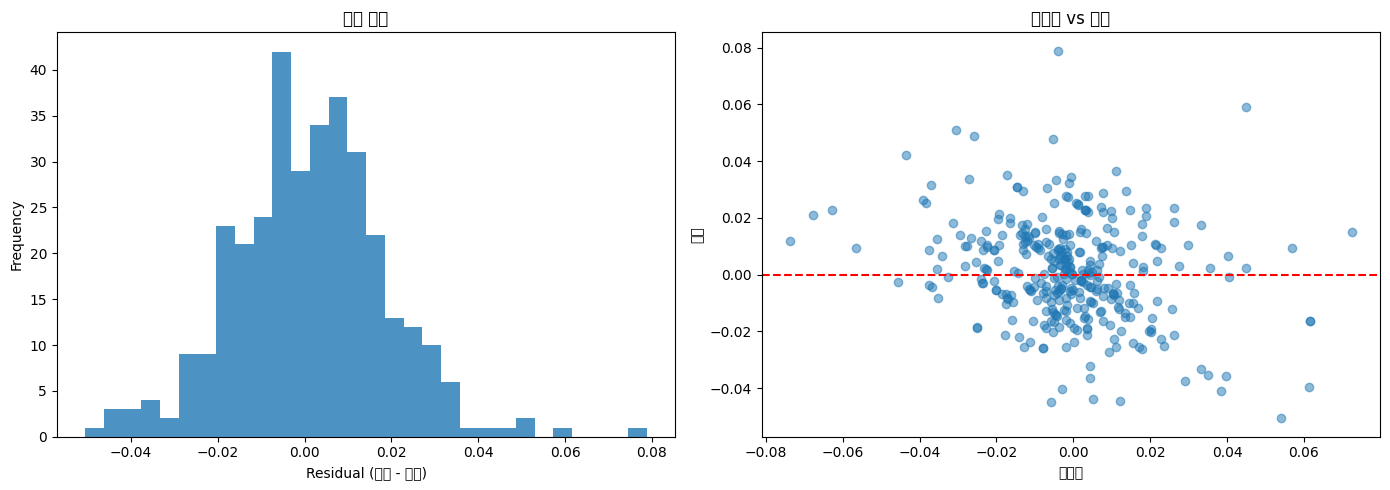

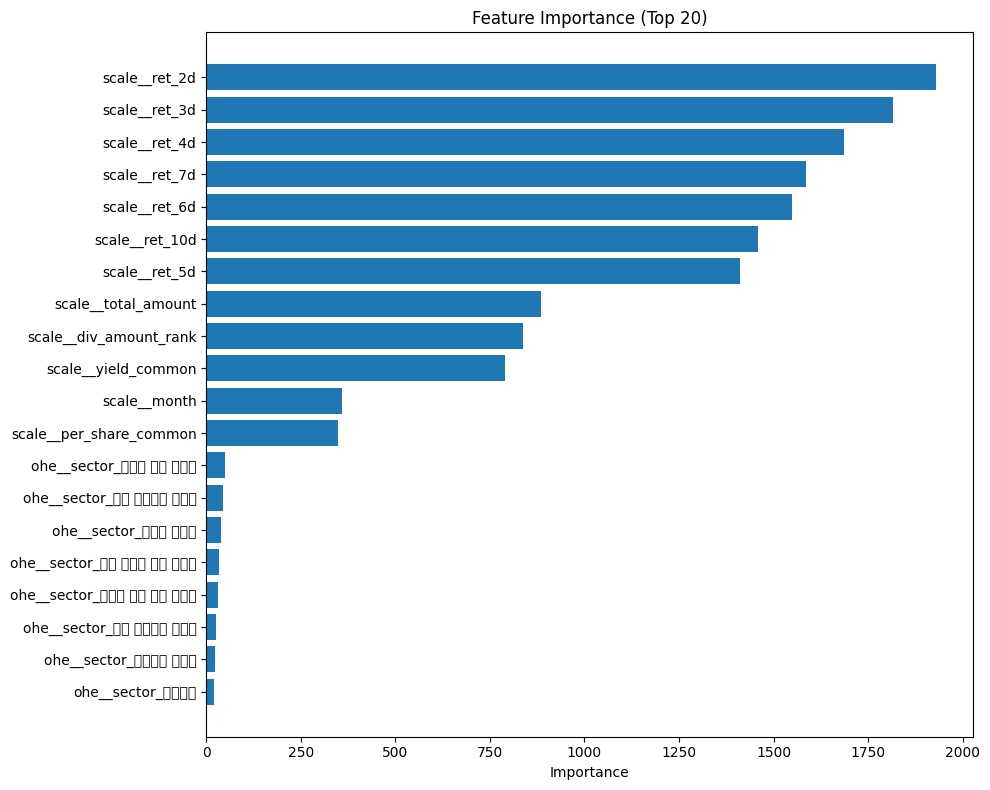

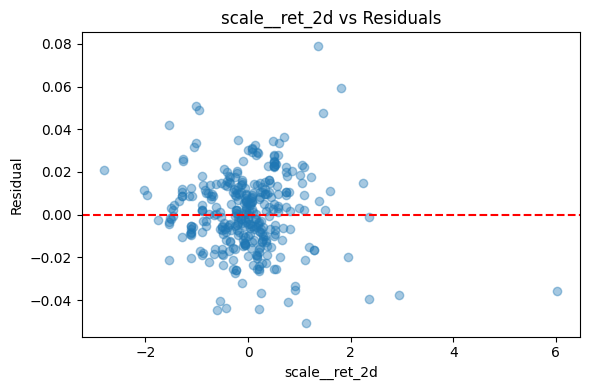

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn이 없으면 자동으로 matplotlib만 사용
try:
    import seaborn as sns
    _USE_SNS = True
except ImportError:
    _USE_SNS = False

from scipy import sparse

# ───────────────────────────────────────────────
# 1. 예측 및 잔차 계산
y_pred = pipe.predict(X_test)
raw_residuals = y_test - y_pred

if isinstance(y_test, pd.Series):
    residuals = pd.Series(raw_residuals, index=y_test.index)
else:
    residuals = pd.Series(raw_residuals, index=np.arange(len(raw_residuals)))

# ───────────────────────────────────────────────
# 2. 잔차 분석 시각화
plt.figure(figsize=(14, 5))

# (1) 잔차 히스토그램
plt.subplot(1, 2, 1)
if _USE_SNS:
    sns.histplot(residuals, kde=True, bins=30)
else:
    plt.hist(residuals, bins=30, alpha=0.8)
    # kde 없음

plt.title("잔차 분포")
plt.xlabel("Residual (실제 - 예측)")
plt.ylabel("Frequency")

# (2) 예측값 vs 잔차
plt.subplot(1, 2, 2)
if _USE_SNS:
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
else:
    plt.scatter(y_pred, residuals, alpha=0.5)

plt.axhline(0, color='red', linestyle='--')
plt.title("예측값 vs 잔차")
plt.xlabel("예측값")
plt.ylabel("잔차")

plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 3. Feature Importance (훈련된 모델로)
reg = pipe.named_steps["reg"]
pre = pipe.named_steps["pre"]

feat_names = pre.get_feature_names_out()
fi = getattr(reg, "feature_importances_", None)
if fi is None:
    raise RuntimeError("이 모델은 feature_importances_ 속성이 없습니다.")

fi_df = pd.DataFrame({"Feature": feat_names, "Importance": fi}) \
         .sort_values("Importance", ascending=False)

# 상위 20개 시각화
plt.figure(figsize=(10, 8))
top20 = fi_df.head(20).iloc[::-1]  # 역순으로 그리기 쉽게
plt.barh(top20["Feature"], top20["Importance"])
plt.title("Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 4. Top feature vs Residuals 산점도
top_feature = fi_df.iloc[0]["Feature"]
feat_names  = pipe.named_steps["pre"].get_feature_names_out()

X_test_trans = pipe.named_steps["pre"].transform(X_test)
idx = list(feat_names).index(top_feature)

if sparse.issparse(X_test_trans):
    # csr_matrix → 1D numpy array
    x_vals = X_test_trans.getcol(idx).toarray().ravel()
else:
    x_vals = np.asarray(X_test_trans[:, idx]).ravel()

plt.figure(figsize=(6, 4))
plt.scatter(x_vals, residuals.values if isinstance(residuals, pd.Series) else residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.title(f"{top_feature} vs Residuals")
plt.xlabel(top_feature)
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5921
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 95
[LightGBM] [Info] Start training from score 0.004621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20454
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 490
[LightGBM] [Info] Start training from score 0.001418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


▶ 회귀 R² (5-fold CV): 0.3061 ± 0.0840
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22420
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 495
[LightGBM] [Info] Start training from score 0.000313


▶ Test R² : 0.4880104175925717
✅ 예측 결과 parquet 저장 완료 → /Users/gun/Desktop/미래에셋 AI 공모전/data/results/regression/regression_predictions_for_ensemble.parquet
✅ 파이프라인 저장 완료 → /Users/gun/Desktop/미래에셋 AI 공모전/data/models/lgbm_regressor_pipeline.pkl


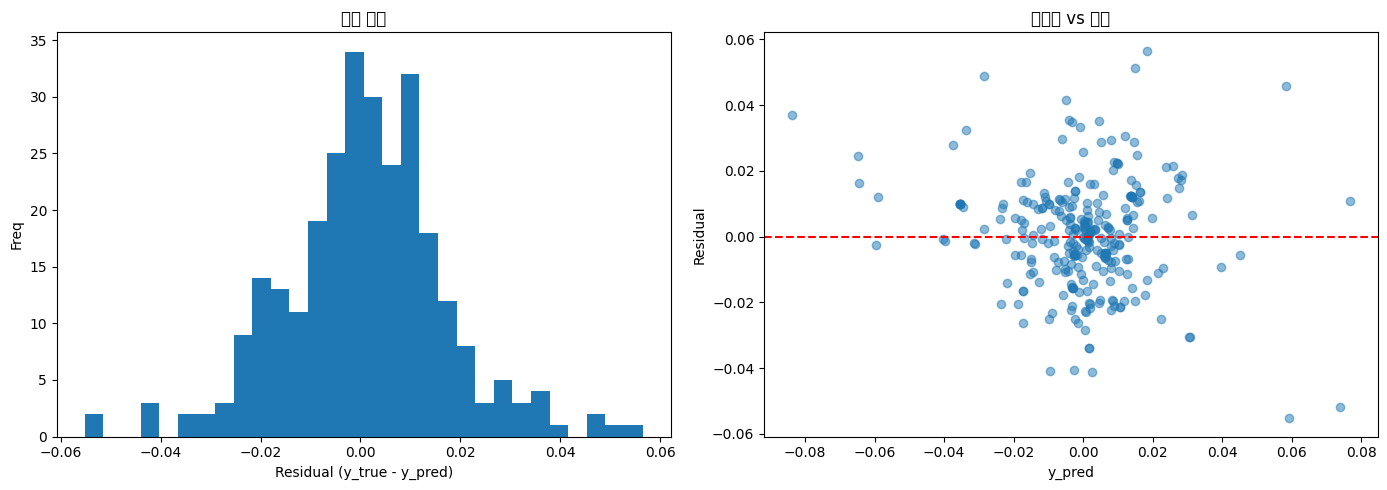

                        Feature  Importance
7                 scale__ret_3d         682
13            scale__gap_before         593
10                scale__ret_6d         562
6                 scale__ret_2d         522
12               scale__ret_10d         514
11                scale__ret_7d         500
9                 scale__ret_5d         497
490        scale__ret2d_vol_nvi         449
491           scale__gap_vol_ui         418
8                 scale__ret_4d         409
22            scale__volume_vpt         371
15      scale__sector_ret_pre1d         350
95          scale__momentum_pvo         341
96   scale__momentum_pvo_signal         326
25            scale__volume_nvi         326
61         scale__trend_kst_sig         297
19             scale__volume_fi         296
97     scale__momentum_pvo_hist         282
59             scale__trend_dpo         277
94     scale__momentum_ppo_hist         253


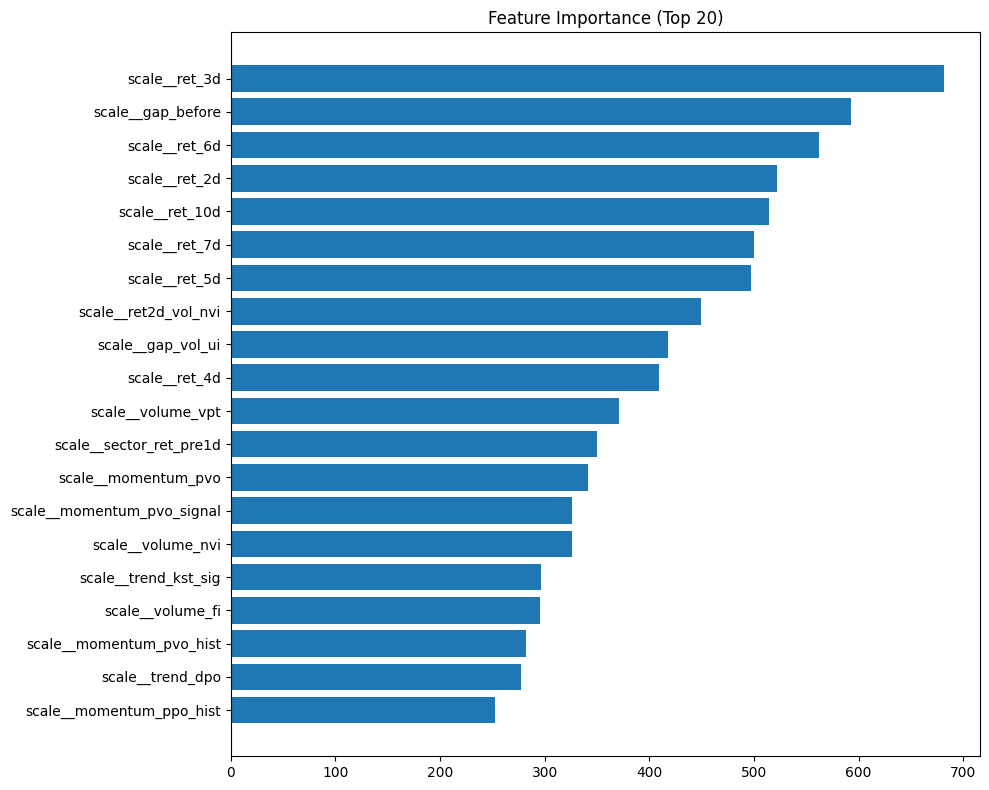

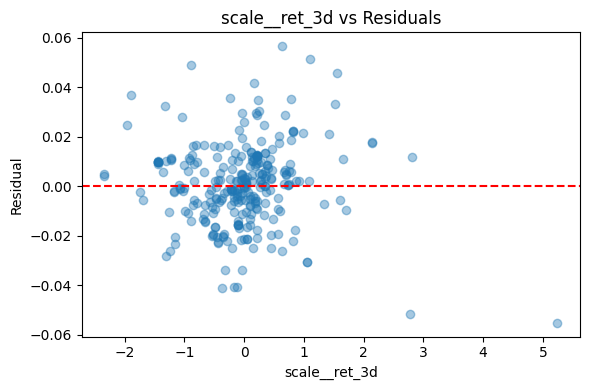

In [7]:
# -*- coding: utf-8 -*-
import os
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import TimeSeriesSplit, cross_val_score, train_test_split
from sklearn.preprocessing  import OneHotEncoder, StandardScaler
from sklearn.compose        import ColumnTransformer
from sklearn.pipeline       import Pipeline
from lightgbm               import LGBMRegressor

import matplotlib.pyplot as plt
from scipy import sparse

# =========================================================
# 경로
# =========================================================
BASE_DIR   = "/Users/gun/Desktop/미래에셋 AI 공모전/data"
MODEL_DIR  = os.path.join(BASE_DIR, "models")
RESULT_DIR = os.path.join(BASE_DIR, "results", "regression")
DATA_FP    = os.path.join(BASE_DIR, "module_datasets", "regression_enriched.csv")  # 없으면 regression.csv로 교체
PIPE_OUT   = os.path.join(MODEL_DIR, "lgbm_regressor_pipeline.pkl")
PRED_CSV   = os.path.join(RESULT_DIR, "regression_predictions_for_ensemble.csv")
PRED_PQ    = PRED_CSV.replace(".csv", ".parquet")

os.makedirs(MODEL_DIR,  exist_ok=True)
os.makedirs(RESULT_DIR, exist_ok=True)

# =========================================================
# 1) 데이터 로드
# =========================================================
if not os.path.exists(DATA_FP):
    DATA_FP = os.path.join(BASE_DIR, "module_datasets", "regression.csv")

df = pd.read_csv(DATA_FP, parse_dates=["rcept_dt"], dtype={"stock_code": str})
df = df.dropna(subset=["ret_1d"]).reset_index(drop=True)

# 추가 파생변수 예시(있으면 생성)
if "ret_2d" in df.columns:
    ql, qh = df["ret_2d"].quantile([0.01, 0.99])
    df["ret_2d_clip"] = df["ret_2d"].clip(ql, qh)
    df["ret_2d_log"]  = np.sign(df["ret_2d_clip"]) * np.log1p(np.abs(df["ret_2d_clip"]))
else:
    df["ret_2d_clip"] = 0.0
    df["ret_2d_log"]  = 0.0

if {"ret_2d_log", "volume_nvi"}.issubset(df.columns):
    df["ret2d_vol_nvi"] = df["ret_2d_log"] * df["volume_nvi"]
if {"gap_before", "volatility_ui"}.issubset(df.columns):
    df["gap_vol_ui"] = df["gap_before"] * df["volatility_ui"]

# =========================================================
# 2) 타깃/피처 분리
# =========================================================
y = df["ret_1d"].values
X = df.drop(columns=["ret_1d", "stock_code", "rcept_dt", "corp_name"], errors="ignore")

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer(
    [
        ("scale", StandardScaler(), num_cols),
        ("ohe",   OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

pipe = Pipeline(
    [
        ("pre", preprocessor),
        ("reg", LGBMRegressor(
            n_estimators=500,
            learning_rate=0.05,
            random_state=42,
            n_jobs=-1
        )),
    ]
)

# =========================================================
# 3) CV / 학습
# =========================================================
tscv = TimeSeriesSplit(n_splits=5)
if len(X) >= tscv.get_n_splits():
    r2 = cross_val_score(pipe, X, y, cv=tscv, scoring="r2", n_jobs=-1)
    print(f"▶ 회귀 R² (5-fold CV): {r2.mean():.4f} ± {r2.std():.4f}")
else:
    print(f"⚠ 샘플 수({len(X)}) 부족 → CV 스킵")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
pipe.fit(X_train, y_train)
print("▶ Test R² :", pipe.score(X_test, y_test))

# =========================================================
# 4) 예측/결과 저장
# =========================================================
y_pred    = pipe.predict(X_test)
residuals = y_test - y_pred

df_out = pd.DataFrame({
    "stock_code": df.loc[X_test.index, "stock_code"].values,
    "rcept_dt":   df.loc[X_test.index, "rcept_dt"].values,
    "y_true":     y_test,
    "y_pred":     y_pred,
    "residual":   residuals
})
df_out.to_csv(PRED_CSV, index=False, encoding="utf-8-sig")

try:
    # fastparquet 엔진 사용
    df_out.to_parquet(PRED_PQ, engine="fastparquet", index=False)
    print(f"✅ 예측 결과 parquet 저장 완료 → {PRED_PQ}")
except Exception as e:
    print("⚠ parquet 저장 실패 → CSV만 유지:", e)

# =========================================================
# 5) 파이프라인 저장
# =========================================================
joblib.dump(pipe, PIPE_OUT)
print(f"✅ 파이프라인 저장 완료 → {PIPE_OUT}")

# =========================================================
# 6) 잔차/중요도 시각화 (선택)
# =========================================================
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

# (1) Residual hist
plt.subplot(1,2,1)
plt.hist(residuals, bins=30)
plt.title("잔차 분포")
plt.xlabel("Residual (y_true - y_pred)")
plt.ylabel("Freq")

# (2) y_pred vs residual
plt.subplot(1,2,2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("예측값 vs 잔차")
plt.xlabel("y_pred")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()

# Feature importance
reg = pipe.named_steps["reg"]
fi  = getattr(reg, "feature_importances_", None)
if fi is not None:
    feat_names = pipe.named_steps["pre"].get_feature_names_out()
    fi_df = pd.DataFrame({"Feature": feat_names, "Importance": fi})\
             .sort_values("Importance", ascending=False)
    print(fi_df.head(20))

    plt.figure(figsize=(10,8))
    top20 = fi_df.head(20)[::-1]
    plt.barh(top20["Feature"], top20["Importance"])
    plt.title("Feature Importance (Top 20)")
    plt.tight_layout()
    plt.show()

    # top feature vs residual
    top_feature = fi_df.iloc[0]["Feature"]
    X_test_trans = pipe.named_steps["pre"].transform(X_test)
    idx = list(feat_names).index(top_feature)
    if sparse.issparse(X_test_trans):
        x_vals = X_test_trans.getcol(idx).toarray().ravel()
    else:
        x_vals = np.asarray(X_test_trans[:, idx]).ravel()

    plt.figure(figsize=(6,4))
    plt.scatter(x_vals, residuals, alpha=0.4)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"{top_feature} vs Residuals")
    plt.xlabel(top_feature)
    plt.ylabel("Residual")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ feature_importances_가 없는 모델입니다.")

In [8]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection    import TimeSeriesSplit, cross_val_score, train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from lightgbm                  import LGBMRegressor

# ── 1) 데이터 로드 (추가 피처 + ret_1d 함께 저장했다고 가정) ────────────────────
DF_FEAT_FP = os.path.join("data", "module_datasets", "regression.csv")
df = pd.read_csv(DF_FEAT_FP, parse_dates=["rcept_dt"], dtype={"stock_code":str})

# ── 2) 타깃 설정(ret_1d) ────────────────────────────────────────────────────
df = df.dropna(subset=["ret_1d"]).reset_index(drop=True)
y = df["ret_1d"]

# ── 3) 피처 분리 ────────────────────────────────────────────────────────────
X = df.drop(columns=["ret_1d","corp_name","stock_code","rcept_dt"], errors="ignore")

# ── 4) 범주형 vs. 수치형 구분 ─────────────────────────────────────────────────
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

# ── 5) 전처리 & 모델 파이프라인 ─────────────────────────────────────────────
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), num_cols),
    ("ohe",   OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
], remainder="drop")

pipe = Pipeline([
    ("pre", preprocessor),
    ("reg", LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1
    ))
])

# ── 6) 시계열 분할 교차검증 ─────────────────────────────────────────────────
tscv = TimeSeriesSplit(n_splits=5)
if len(X) >= tscv.get_n_splits():
    r2 = cross_val_score(pipe, X, y, cv=tscv, scoring="r2", n_jobs=-1)
    print(f"▶ 회귀 R² (5-fold CV): {r2.mean():.4f} ± {r2.std():.4f}")
else:
    print(f"⚠️ 샘플 수({len(X)})가 부족해 CV를 스킵합니다 (필요: {tscv.get_n_splits()})")

# ── 7) 최종 학습 ───────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
pipe.fit(X_train, y_train)
print("▶ Test R² :", pipe.score(X_test, y_test))

# ── 8) 전체 데이터 예측 & 잔차 계산 ─────────────────────────────────────────
y_pred_all = pipe.predict(X)
residual_all = y.values - y_pred_all  # y가 없는 행은 이미 drop했으니 여기서는 전부 존재

out = df[["corp_name", "stock_code", "rcept_dt"]].copy()
out["y_pred"]   = y_pred_all
out["residual"] = residual_all

PRED_CSV = os.path.join("data", "results", "regression", "regression_predictions_for_ensemble.csv")
os.makedirs(os.path.dirname(PRED_CSV), exist_ok=True)
out.to_csv(PRED_CSV, index=False, encoding="utf-8-sig")
print(f"✅ 예측 결과 저장 → {PRED_CSV} (rows={len(out)})")

# ── 9) 모델 저장 ───────────────────────────────────────────────────────────
import joblib
MODEL_OUT = os.path.join("data", "models", "lgbm_regressor.pkl")
os.makedirs(os.path.dirname(MODEL_OUT), exist_ok=True)
joblib.dump(pipe, MODEL_OUT)
print(f"✅ 회귀 모델 저장 완료 → {MODEL_OUT}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 1141, number of used features: 31
[LightGBM] [Info] Start training from score 0.000448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 17
[LightGBM] [Info] Start training from score 0.003642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


▶ 회귀 R² (5-fold CV): 0.3092 ± 0.0543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2594
[LightGBM] [Info] Number of data points in the train set: 1367, number of used features: 33
[LightGBM] [Info] Start training from score 0.000098


▶ Test R² : 0.36703878087646413
✅ 예측 결과 저장 → data/results/regression/regression_predictions_for_ensemble.csv (rows=1709)
✅ 회귀 모델 저장 완료 → data/models/lgbm_regressor.pkl
